# Supervised Learning
## Linear Regression (univariate)

[walter.daelemans@uantwerpen.be](mailto:walter.daelemans@uantwerpen.be)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
print(sklearn.__version__)

1.2.2


A Machine Learning experiment implies a number of steps:

1. Collect the data (or download it), annotate, pre-process, inspect, visualize, ...
2. Divide into train and test
3. Train (fit) the model on the train data
4. Use the model to predict the output of the unseen (by the model) test data and evaluate the performance of the model on the test data by comparing the output of the model with the 'true' output (gold standard)

### 1. Data collection and inspection

We load the real_estate dataset (origin = Kaggle): pandas has read methods for csv, excel etc. <br>
https://www.kaggle.com/quantbruce/real-estate-price-prediction?select=Real+estate.csv#

Refer to https://pandas.pydata.org/docs/user_guide/io.html#io for other types of Pandas readers and writers.

You can find some more information about the dataset here: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

The inputs:
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station, MRT = Taipei Mass Rapid Transit (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude (unit: degree)
- X6=the geographic coordinate, longitude (unit: degree)

The output:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)



In [5]:
# The variable name df is not very informative, but it will do for this toy example
df = pd.read_csv("data/real_estate.csv")

In [6]:
# Check what is in the dataset
# First samples (last = .tail)
# Instead of the default 5 we can get more or less

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
# Let's use some more shorthand feature names

df.columns = ['No', 'Date', 'Age', 'Distance', 'Stores', 'Lat', 'Long', 'Price']

In [8]:
df.head()

,No,Date,Age,Distance,Stores,Lat,Long,Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
# provide for each feature the descriptive statistical properties
# of numeric features
df.describe()

,No,Date,Age,Distance,Stores,Lat,Long,Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
# .describe produces a new Pandas dataframe or series
d = df.describe()
print(d['Price'])
print(type(d['Price']))

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Price, dtype: float64
<class 'pandas.core.series.Series'>


### Reminder: box plots

Descriptive statistics using a box plot: 
- Median (50th percentile)
- Q1 (25th percentile)
- Q3 (75th percentile)
- Distance between Q1 and Q3 (interquartile range)
- Minimum (Q1 - 1.5 IQR) (bottom whisker)
- Maximum (Q3 + 1.5 IQR) (top whisker)
- Outliers

<Axes: >

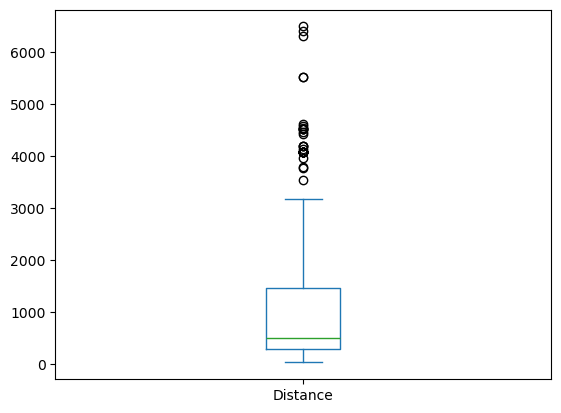

In [12]:
df['Distance'].plot(kind='box')

In [13]:
# More information about a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        414 non-null    int64  
 1   Date      414 non-null    float64
 2   Age       414 non-null    float64
 3   Distance  414 non-null    float64
 4   Stores    414 non-null    int64  
 5   Lat       414 non-null    float64
 6   Long      414 non-null    float64
 7   Price     414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [14]:
# Are there any missing values?
df.isnull().sum()

No          0
Date        0
Age         0
Distance    0
Stores      0
Lat         0
Long        0
Price       0
dtype: int64

In [15]:
interesting_columns = ['Date', 'Age', 'Distance', 'Stores', 'Lat', 'Long', 'Price']

In [16]:
# We can look at correlations between features to look for highly informative features and redundancy
df[interesting_columns].corr()

,Date,Age,Distance,Stores,Lat,Long,Price
Date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
Age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Lat,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Long,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [17]:
# Correlations with the output (Price) are most important to investigate
df[interesting_columns].corr()['Price']

Date        0.087491
Age        -0.210567
Distance   -0.673613
Stores      0.571005
Lat         0.546307
Long        0.523287
Price       1.000000
Name: Price, dtype: float64

#### Visualize data

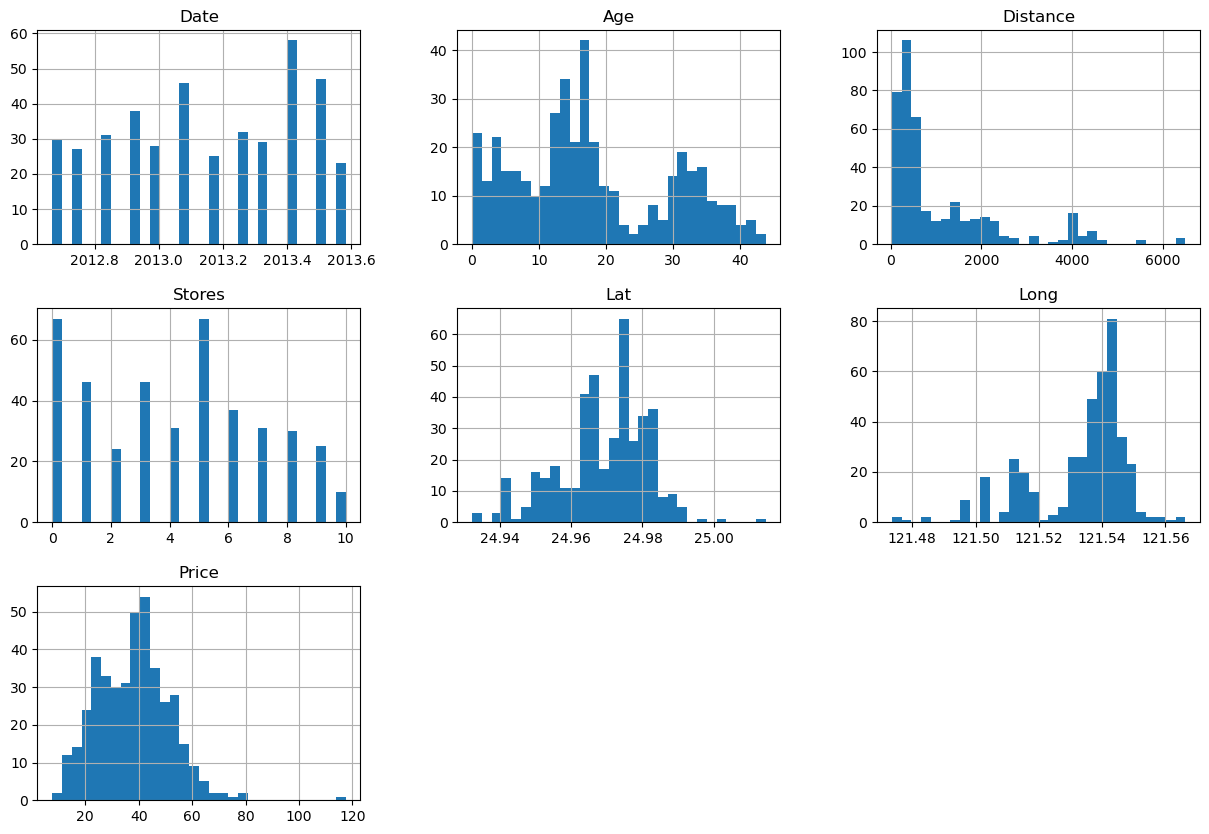

In [19]:
# By looking at histograms, we can get a sense of the distribution of our data (normal or not, uni- or multi-modal, ...)

pd.plotting.hist_frame(df[interesting_columns], figsize=(15,10), bins=30);

In [20]:
# for homework
#pd.plotting.scatter_matrix(df[interesting_columns], figsize=(15,10));

<Axes: xlabel='Age', ylabel='Price'>

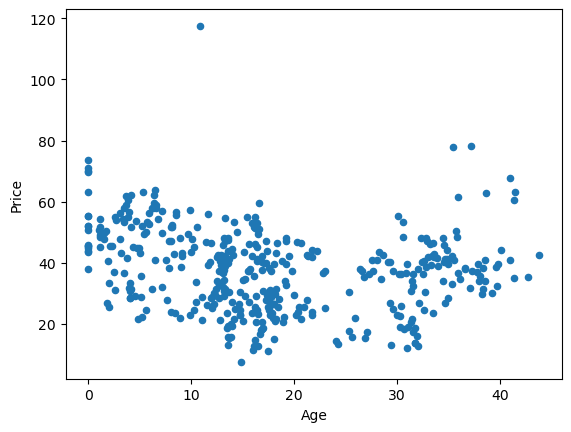

In [21]:
# By looking at scatter plots, we can inspect the distribution of values of a feature over the price output value.
# Linear regression will find the trendline for this data and the trendline will be the model.

df.plot(kind='scatter', x='Age', y='Price')

In [22]:
# For homework

# The latitude and longitude are interesting, they correlate with Price but also with each other

# We can string them together
# df['Lat_long_combined'] = df['Lat'].astype('str') + '_' + df['Long'].astype('str')
# problem: could not convert string to float

# We can make them complex numbers to combine them:
#df['Lat_long_combined'] = df['Long'] + df['Lat'] * 1j
# problem: complex numbers not supported in this context

df.head()


,No,Date,Age,Distance,Stores,Lat,Long,Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### 2. Define input and output



We will investigate the relation between Age and Price. Can we predict Price on the basis of Age of the house.

- We divide the relevant data into a train and test partition
- We will train the model on train, and test on the unseen test data (for which we do know the correct output, i.e., the gold standard)
- We compare the predicted output to the gold standard output

In [25]:
from sklearn.model_selection import train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#### create datasets

In [28]:
# Define the input values
X = df[['Age']]

In [29]:
len(X)

414

In [30]:
# Define the output values
y = df['Price']

In [31]:
len(y)

414

In [32]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Price, Length: 414, dtype: float64

In [33]:
X

,Age
0,32.0
1,19.5
2,13.3
3,13.3
4,5.0
...,...
409,13.7
410,5.6
411,18.8
412,8.1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=.33)

# we use a random_state for replicability of experiments
# we randomize (shuffle) the data before dividing
# we keep 1/3 for testing and 2/3 for training

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape # ALWAYS do this to sanity check the data division

((277, 1), (277,), (137, 1), (137,))

In [36]:
X_train.head()

,Age
396,37.1
239,18.1
83,25.3
168,27.6
323,28.6


In [37]:
y_train.head()

396    31.9
239    29.7
83     17.7
168    37.4
323    42.5
Name: Price, dtype: float64

### 3. Train (fit) the model

#### Linear Regression

- It is regression (output is a number)
- Can be univariate or multiple (one or more input features / independent variables; one output class / dependent variable)
- The model is a straight line, hence linear, on the data points
- A straight line has as definition: 
    - f(x) = predicted y = $wx + b$
    - A line is defined by two values: the intercept (b, where it crosses y-axis), and the coefficient or weight (w) determining the slope and direction of the line
    - Or for the case with more than one feature: $w_1x_1 + w_2x_2 +  ...  + w_nx_n + b$


In [40]:
# Import the right submodule
from sklearn.linear_model import LinearRegression 

More information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [42]:
# Create a linear regression instance with default hyperparameters
lr = LinearRegression()

In [43]:
# Train (fit) the model on the data (supervised, so X and y are given)
lr.fit(X_train, y_train)

LinearRegression()

That's it!

Our model is now fit on the training data and has looked for the  coefficient (w) and intercept (b) in the line y = wx + b that best fit the datapoints. We can inspect the solution by looking at lr.coef_ and lr.intercept_ (the underscore at the end means in sklearn that this variable was computed during fitting and is only available after fitting (training) has been done).


In [45]:
lr.coef_ # the slope and direction

array([-0.2556221])

In [46]:
lr.intercept_ # the y-value at x-value 0

43.084969375948376

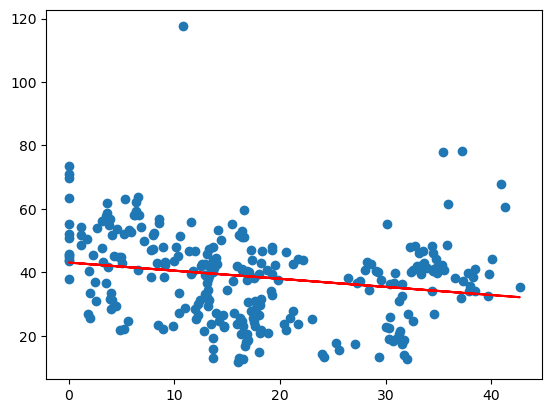

In [47]:
# we plot the model (the red line) on the scatterplot of the training data (a subset of the complete dataset!)

x = X_train['Age']
y = y_train
plt.scatter(x, y)
coef = lr.coef_[0]
intercept = lr.intercept_
plt.plot(x, x * coef + lr.intercept_, color='Red');

### 4. Evaluate the model

In [49]:
# We can make predictions for different house ages

print(lr.predict([[1]])) # Price of a brand new house
print(lr.predict([[150]])) # a 150 year old house is very cheap according to this model

[42.82934728]
[4.74165466]


/Users/walter/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/walter/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
# the linear regression also estimates its performance on the train data (how well does the model do on the training data?)

lr.score(X_train, y)

0.043441982733742446



The score ($R^2$) here measures how well the model fits the *training* data.

This `coefficient of determination` $R^2$ is defined as
        $(1 - \frac{u}{v})$, where $u$ is the residual
        sum of squares `((y_true - y_pred) ** 2).sum()` and $v$
        is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`.
        The best possible score is 1.0 (all train items predicted perfectly) and it can be negative (if it does worse than always predicting the mean). A model that always predicts the expected value of $y$, disregarding the input features, would get a $R^2$ score of 0.0.
        
Explanation in sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

$R^2$ represents the proportion of variance (of y) that has been explained by the independent variable (input) in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples *are likely* to be predicted by the model, through the proportion of explained variance.

Of course, the interesting value of $R^2$ is the one on unseen (test) data.  


#### Evaluating the model on test data

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

MSE computes the average of the squared differences between predicted value and gold standard value. Lower is better!

In [55]:
y_test_pred = lr.predict(X_test)
#y_test_pred

In [56]:
r2_score(y_test, y_test_pred)

0.025404480183082057

In [57]:
mean_squared_error(y_test, y_test_pred)

156.32530415748332

So our conclusion can only be that the Age of a house alone is not a very good predictor of its price: it only explains a small part of the variance of the price and provides a large MSE on unseen data.

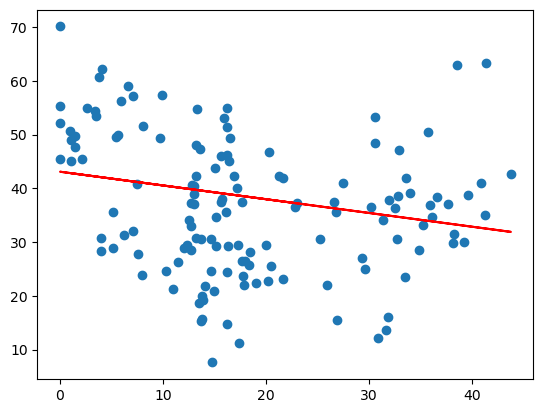

In [59]:
# visualisation of the model on the test data

x = X_test['Age']
y = y_test
plt.scatter(x, y)
coef = lr.coef_[0]
intercept = lr.intercept_
plt.plot(x, x * coef + lr.intercept_, color='Red')

## Multiple Linear Regression

We can also do multiple linear regression. In that case we learn a linear model of the form $y = a_1x_1 + a_2x_2 + ... + a_mx_m + b$. In the code below we use all features, except the price as predictors.

In [61]:
X = df[['Date', 'Age', 'Distance', 'Stores', 'Lat', 'Long']]
y = df['Price']
print(X.shape, y.shape)

(414, 6) (414,)


In [62]:
X = df[['Date', 'Age', 'Distance', 'Stores', 'Lat', 'Long']]
y = df['Price']

# We split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=.33)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(277, 6) (277,) (137, 6) (137,)


In [63]:
# we create the model and fit it on train
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f' coef = {lr.coef_}\n intercept = {lr.intercept_}\n score (on train) = {lr.score(X,y)}')

y_test_pred = lr.predict(X_test)
print(f'R2 (on test) = {r2_score(y_test, y_test_pred)}\nMSE (on test) = {mean_squared_error(y_test, y_test_pred)}')

 coef = [ 5.78388390e+00 -2.41909429e-01 -5.34856166e-03  1.05112941e+00
  2.49847549e+02 -6.48114341e+01]
 intercept = -9961.728738157419
 score (on train) = 0.578667124234358
R2 (on test) = 0.5543290556931294
MSE (on test) = 71.48570304941695


#### Interpretation of the model

price = 5.8 Date - 0.2 Age - 0.01 Distance + 1.1 Stores + 249.8 Latitude - 64.8 Longitude - 9961.7 


The coefficients give the **direction** of the linear relation and the **magnitude** of it. E.g., If Date is higher (i.e., a more recent sell), then the Price will be higher. 1 unit increase of Date will give a 5.8 unit increase in Price, all other features being held constant.

Linear Regression is easy to interpret!

Unfortunately, the formula does not yet make much sense because the features were not scaled.

## The importance of scaling (normalization)

While scaling or normalization does not affect the MSE or $R^2$ of a linear regression model, it can offer other advantages, especially in terms of interpretability and optimization.
Different features have different ranges of values. The StandardScaler transforms the values of each feature to a normalized version (z-score: the value minus the mean divided by the sd: this gives us a distribution of values with mean 0 and sd -1 and 1).

Whenever you have different numeric features in a dataset with different max and min values, scale it. It does no harm and can make a large difference for some machine learning and optimization methods.

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [68]:
X = df[['Date', 'Age', 'Distance', 'Stores', 'Lat', 'Long']]
y = df['Price']

scaler.fit(X) # compute the mean and sd for each feature
X_norm = scaler.transform(X) # transform each value of each feature to its scaled value

In [69]:
X_norm

array([[-0.82368321,  1.25562833, -0.79249504,  2.00740743,  1.12542986,
         0.44876222],
       [-0.82368321,  0.15708622, -0.61661163,  1.66750286,  0.91244418,
         0.40113894],
       [ 1.54115111, -0.38779067, -0.41401527,  0.30788458,  1.48686011,
         0.68818339],
       ...,
       [ 0.35873395,  0.09556786, -0.54967846,  0.98769372,  0.82289338,
         0.42397202],
       [-0.52896662, -0.84478419, -0.77668389,  0.30788458, -0.18475479,
         0.4768143 ],
       [ 1.24643452, -0.98539758, -0.78807071,  1.66750286,  0.42757905,
         0.63534112]])

<Axes: ylabel='Frequency'>

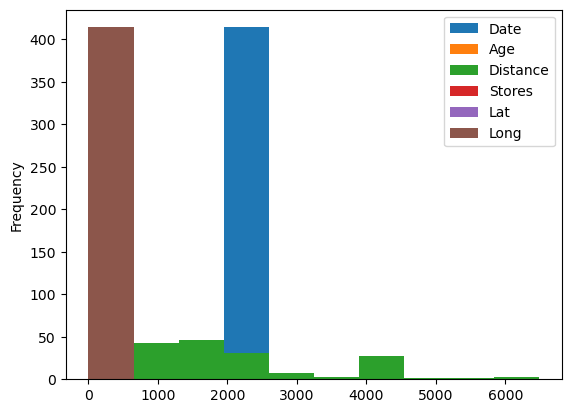

In [70]:
X.plot(kind='hist')

<Axes: ylabel='Frequency'>

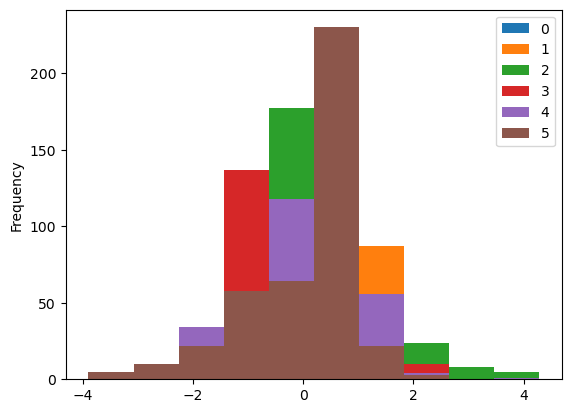

In [71]:
pd.DataFrame(X_norm).plot(kind='hist')

Let's do the whole pipeline again, but now with scaled features.

In [73]:
X = df[['Date', 'Age', 'Distance', 'Stores', 'Lat', 'Long']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=.33)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

scaler = StandardScaler()
scaler.fit(X_train) # compute the mean and sd for each feature
X_train_norm = scaler.transform(X_train) # transform each value of each feature to its scaled value
#print(X_train_norm)

X_test_norm = scaler.transform(X_test) # use the scaling made during training!

lr = LinearRegression()
lr.fit(X_train_norm, y_train)

print(f' coef = {lr.coef_}\n intercept = {lr.intercept_}\n score (on train) = {lr.score(X,y)}')

y_test_pred = lr.predict(X_test_norm)
print(f'R2 (on test) = {r2_score(y_test, y_test_pred)}\nMSE (on test) = {mean_squared_error(y_test, y_test_pred)}')

(277, 6) (277,) (137, 6) (137,)
 coef = [ 1.62596809 -2.75772468 -6.61631703  3.15987728  3.11074082 -0.97060693]
 intercept = 38.61841155234717
 score (on train) = -461892.3230071999
R2 (on test) = 0.5543290556931679
MSE (on test) = 71.48570304941079


/Users/walter/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Our new equation:

price = 1.6 Date - 2.8 Age - 6.6 Distance + 3.2 Stores + 3.1 Latitude - 1.0 Longitude + 38.6

As can be seen from the results, the performance is the same, but now the equation is better interpretable as all features have the same scale.

[1.6259680938387568, 2.757724684414958, 6.6163170254056665, 3.159877275949454, 3.110740819327909, 0.9706069347667481]


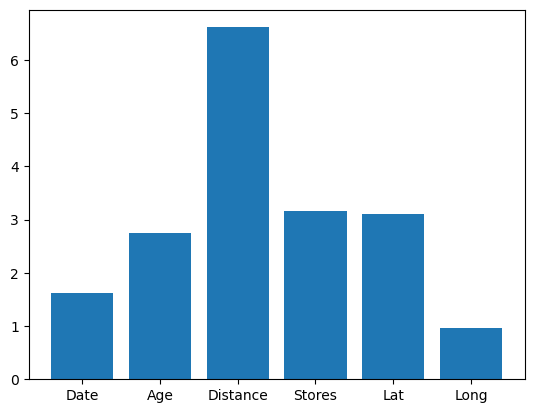

In [75]:
# Importance of features on price

data = lr.coef_
data = list(map(abs, data))
data_labels = ['Date', 'Age', 'Distance', 'Stores', 'Lat', 'Long']
print(data)
plt.bar(data_labels, data)
plt.show()


#### Interpretation of Multiple Linear Regression models

A single feature gives a regression line, two features a regression plane, three or more a regression hyperplane.

Here is an example:

<img src="figures/linear_regression_two_independent_vars.jpg" alt="alt text" width="600">



### Summary Linear Regression

- We start with a set of data points (examples, instances, samples, ...), each consisting of an input and an output (so it is *supervised* learning)
    - By convention we will use **X** to refer to input and **y** to refer to output
    - Each X can be a single feature value or a *vector* (sequence) of features values
    - Each y is a single feature value representing the output corresponding to a specific input
        - Example 1 (univariate linear regression): X = Age, y = price per unit
        - Example 2 (multiple linear regression): X = Age, Distance, Stores, y = price per unit
     - We divide the data into train data and test data
     
- We construct or **train** a **model** by **fitting** the train data
    - The ML algorithm constrains the form the model can take
        - In linear regression the model is limited to a line in the univariate case and different lines with differen slopes crossing in one intercept (forming a hyperplane) in the multiple case
        - Consequently, the model has the form $y = wx + b$ (univariate) or $y = w_1x_1 + w_2x_2 + ... + w_mx_m + b$ given that there are $m$ features in the input
        - The $w_i$ and $b$ are the **parameters** of the model, the $x_i$ are the input(s)
        - In this case, the $b$ parameter is the intercept and the $w_i$ are the slopes for each line belonging to each of the input features forming the hyperplane
        - We can also use $f(X) = y$ (function notation)
    - Once the model is trained, we can use it to make **predictions**
        - $f(X) = \hat{y}$ (the hat denotes that this is not an 'attested' y but a predicted y for that X)
        - For example: $f(32.0, 84.9, 10) = \hat{y} = w_1*32 + w_2*84.9 + w_3*10+b$

- We can **test** our model on the test data
    - To get a quantitative measure of how good the model is, we use an **evaluation metric**
    - In linear regression we can use (as one option) the mean squared error (MSE)
    - For each test item we are going to compare the predicted y and the real y, square it and sum the squares
        - MSE = $\frac{1}{n} \sum_{i=1}^{n} \left(f(X_i) - y_i\right)^2$ for n test items
        - The distances between the data points and the regression line are also called the **residuals**
